In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [2]:
# Load InceptionV3 without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional)
base_model.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (Crack/No Crack)

# Create the model
inceptionModel = Model(inputs=base_model.input, outputs=x)

# Compile the model
inceptionModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [3]:
from tensorflow.keras.applications import InceptionV3

# Load InceptionV3 without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional)
base_model.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (Crack/No Crack)

# Create the model
inceptionModel = Model(inputs=base_model.input, outputs=x)

# Compile the model
inceptionModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
batch_size = 32

# Image augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data_8k/train',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    'data_8k/validation',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 1845 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


In [5]:
history = inceptionModel.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7039 - loss: 7.3469 - val_accuracy: 0.9028 - val_loss: 0.5438
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8884 - loss: 0.7292 - val_accuracy: 0.9479 - val_loss: 0.1475
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9286 - loss: 0.2226 - val_accuracy: 0.9514 - val_loss: 0.1401
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9374 - loss: 0.1895 - val_accuracy: 0.9618 - val_loss: 0.1197
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9358 - loss: 0.1665 - val_accuracy: 0.9583 - val_loss: 0.1240
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9323 - loss: 0.1952 - val_accuracy: 0.9722 - val_loss: 0.1037
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.9463 - loss: 0.1431 - val_accuracy: 0.9653 - val_loss: 0.1012
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9358 - loss: 0.1785 - val_accuracy: 0.9618 - v

In [6]:
test_loss, test_accuracy = inceptionModel.evaluate(validation_generator)
print(f"InceptionV3 Model - Accuracy: {test_accuracy:.4f}, Loss: {test_loss:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9573 - loss: 0.1053
InceptionV3 Model - Accuracy: 0.9618, Loss: 0.0901


In [7]:
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"  # Change to your image path

im = cv2.imread(random_image_path)
im = cv2.resize(im, (224, 224))
im = im / 255.0  # Normalize
im = np.expand_dims(im, axis=0)  # Add batch dimension

prediction = inceptionModel.predict(im)[0][0]

if prediction > 0.5:
    print("Crack Detected")
else:
    print("No Crack Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
No Crack Detected


In [10]:
random_image_path2 = r"C:\Users\USER\Desktop\CRACK_DETECTION\istockphoto-1080117220-612x612_2.jpg"

im = cv2.imread(random_image_path2)
im = cv2.resize(im, (224, 224))
im = im / 255.0  # Normalize
im = np.expand_dims(im, axis=0)  # Add batch dimension

prediction = inceptionModel.predict(im)[0][0]

if prediction > 0.5:
    print("Crack Detected")
else:
    print("No Crack Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
No Crack Detected


In [20]:
# Save the model in .h5 format
inceptionModel.save('inception_model.h5')

# Or save it in .keras format
inceptionModel.save('inception_model.keras')


In [25]:
# Correct model loading for .h5 format
from keras.models import load_model

# Load the model (adjust the path as needed)
model = load_model('inception_model.h5')

# Continue with the rest of the code...
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"
# Read and process the image
image = cv2.imread(random_image_path)
image_resized = cv2.resize(image, (224, 224))
image_resized = image_resized / 255.0  # Normalize
image_resized = np.expand_dims(image_resized, axis=0)  # Add batch dimension

# Predict with the model
prediction = model.predict(image_resized)

# Interpret the result
if prediction[0] > 0.1:
    result = "Crack detected"
    color = (0, 0, 255)  # Red for crack
else:
    result = "No crack detected"
    color = (0, 255, 0)  # Green for no crack

# Display the result
cv2.putText(image, result, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
cv2.imshow("Crack Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


In [26]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))


In [27]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

image_resized = preprocess_input(image_resized)


In [28]:
# Unfreeze the last few layers of the base model
base_model.trainable = True
fine_tune_at = 100  # Choose an appropriate layer number to unfreeze (e.g., unfreeze last 100 layers)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


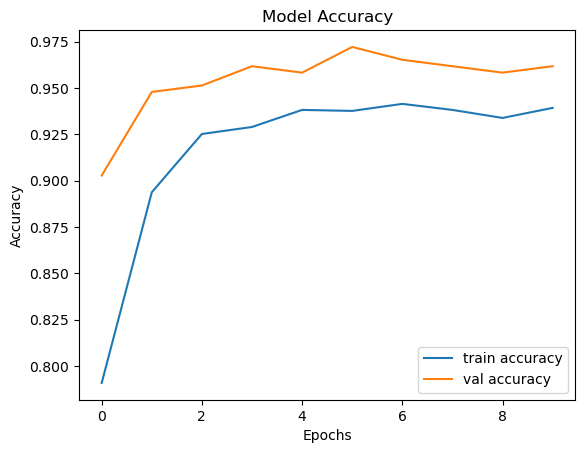

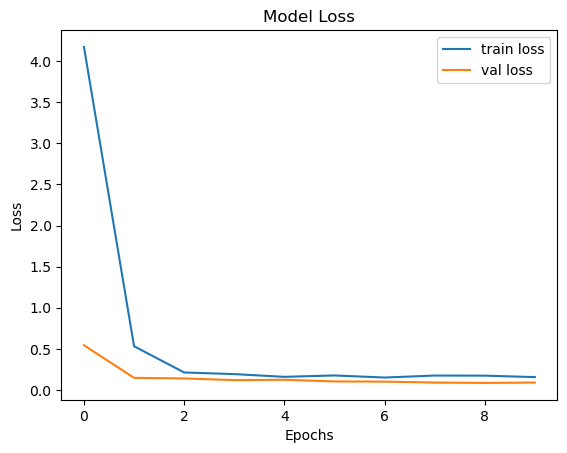

In [29]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [1]:
import cv2
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt



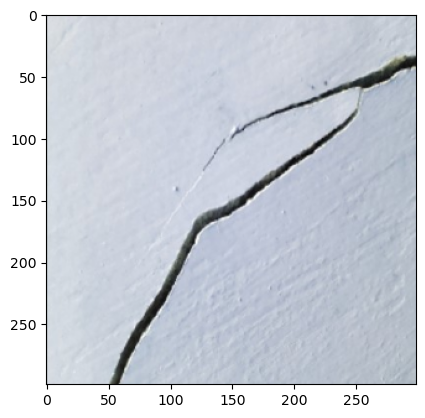

In [3]:
# Load the image
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_2.jpg"
img = cv2.imread(random_image_path)

# Resize the image to 299x299 (required for InceptionV3)
img_resized = cv2.resize(img, (299, 299))

# Convert to RGB (since OpenCV loads as BGR)
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Convert to batch format
img_resized_rgb = np.expand_dims(img_resized_rgb, axis=0)

# Preprocess for InceptionV3
img_preprocessed = preprocess_input(img_resized_rgb)

# Display the preprocessed image 
plt.imshow(img_resized_rgb[0])
plt.show()


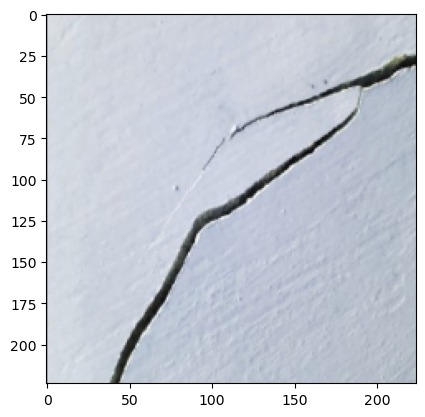

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
🔴 Crack Detected


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the trained model
model = load_model("inception_model.h5")  # Ensure the path is correct

# Load the image
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_2.jpg"
img = cv2.imread(random_image_path)

if img is None:
    raise ValueError("Error: Image not found. Check the file path!")

# Resize the image to 224x224 (as expected by the model)
img_resized = cv2.resize(img, (224, 224))  # Fix: Match model input size

# Convert to RGB format
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Convert to batch format
img_resized_rgb = np.expand_dims(img_resized_rgb, axis=0)

# Preprocess the image for InceptionV3
img_preprocessed = preprocess_input(img_resized_rgb)

# Display the preprocessed image (optional)
plt.imshow(img_resized_rgb[0])
plt.show()

# Predict using the model
prediction = model.predict(img_preprocessed)


# Interpret the result (assuming binary classification: 0 = No Crack, 1 = Crack)
if prediction[0][0] > 0.3:
    print("🔴 Crack Detected")
else:
    print("🟢 No Crack Detected")


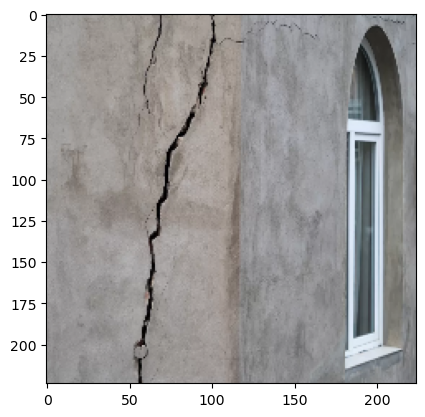

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
🔴 Crack Detected


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the trained model
model = load_model("inception_model.h5")  # Ensure the path is correct

# Load the image
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"
img = cv2.imread(random_image_path)

if img is None:
    raise ValueError("Error: Image not found. Check the file path!")

# Resize the image to 224x224 (as expected by the model)
img_resized = cv2.resize(img, (224, 224))  # Fix: Match model input size

# Convert to RGB format
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Convert to batch format
img_resized_rgb = np.expand_dims(img_resized_rgb, axis=0)

# Preprocess the image for InceptionV3
img_preprocessed = preprocess_input(img_resized_rgb)

# Display the preprocessed image (optional)
plt.imshow(img_resized_rgb[0])
plt.show()

# Predict using the model
prediction = model.predict(img_preprocessed)



# Interpret the result (assuming binary classification: 0 = No Crack, 1 = Crack)
if prediction[0][0] > 0.5:
    print("🔴 Crack Detected")
else:
    print("🟢 No Crack Detected")


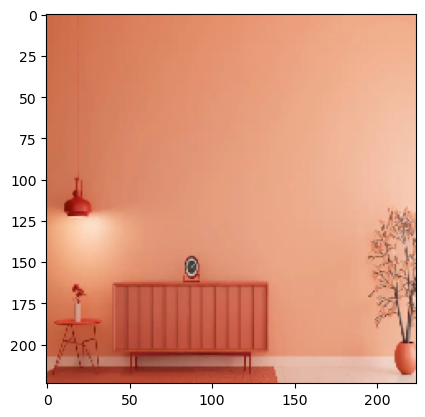

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
🟢 No Crack Detected


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the trained model
model = load_model("inception_model.h5")  # Ensure the path is correct

# Load the image
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_3.jpg"
img = cv2.imread(random_image_path)

if img is None:
    raise ValueError("Error: Image not found. Check the file path!")

# Resize the image to 224x224 (as expected by the model)
img_resized = cv2.resize(img, (224, 224))  # Fix: Match model input size

# Convert to RGB format
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Convert to batch format
img_resized_rgb = np.expand_dims(img_resized_rgb, axis=0)

# Preprocess the image for InceptionV3
img_preprocessed = preprocess_input(img_resized_rgb)

# Display the preprocessed image (optional)
plt.imshow(img_resized_rgb[0])
plt.show()

# Predict using the model
prediction = model.predict(img_preprocessed)



# Interpret the result (assuming binary classification: 0 = No Crack, 1 = Crack)
if prediction[0][0] > 0.5:
    print("🔴 Crack Detected")
else:
    print("🟢 No Crack Detected")
